#HW6


In [153]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rd

In [154]:
GAMMA = 1.0
ALPHA = 0.1
EPSILON = 0.3
WORLD_SIZE = [5,10]
SWAMPS = [[0,i]for i in range(10)]
S0 = [1, 0]
ST = [1, 9]
# left, up, right, down
ACTIONS = [[0, -1], [-1, 0], [0, 1], [1, 0]] # left, up, right, down

n_step = 5


In [155]:
def step(state, action):
  state_n = np.array(state) + np.array(action)
  state_n = [np.clip(state_n[0],0,4),np.clip(state_n[1],0,9)]
  reward = -100 if state_n in SWAMPS else -1
  return [state_n, reward]

In [156]:
def chooseAction(state, qtable, epsilon):
  if rd.rand()>=epsilon:
    return np.argmax(qtable[state[0],state[1]])
  else:
    return rd.randint(4)

In [157]:
def sarsa():
  qtable = rd.rand(5,10,4)
  for i in range(4):
    qtable[ST[0], ST[1], i] = 0
  returns = []
  for episode in range(1000):
    state = S0
    action = chooseAction(state, qtable, EPSILON)
    G = 0
    while state != ST:
      
      ######## YOUR CODE HERE ########
      next_state, reward = step(state, ACTIONS[action])
      next_action = chooseAction(next_state, qtable, EPSILON)
      oldEstimate = qtable[state[0], state[1], action]
      update_val = ALPHA * (reward + GAMMA * qtable[next_state[0], next_state[1], next_action] - oldEstimate)
      qtable[state[0], state[1], action] += update_val
      state = next_state
      action = next_action
      G += reward

      ####################################
    returns.append(G)
    
  return returns, qtable

In [159]:
def n_step_sarsa():
  qtable = rd.rand(5,10,4)
  returns = []
  for i in range(4):
    qtable[ST[0], ST[1], i] = 0
  for episode in range(1000):
    state = S0
    action = chooseAction(state, qtable, EPSILON)
    G = 0

    # If you don't want to use the following settings, you can change them.

    # initiaize the recond list
    record = [(S0, action, 0)] # record the states actions and rewards
    tau = -n_step + 1 # to indicate when to update

    while state != ST:
      next_state, reward = step(state, ACTIONS[action])
      G = GAMMA * G + reward # for plot learning curve
      next_action = chooseAction(next_state, qtable, EPSILON)
      action = next_action
      state = next_state
      record.append((next_state, next_action, reward))
      if tau >= 0:
        update_val = 0
        # sigma R
        for k in range(tau + 1, tau + n_step + 1):
          update_val += (GAMMA ** (k - tau - 1)) * record[k][2]
        update_val += (GAMMA ** n_step) * qtable[record[tau + n_step][0][0], record[tau + n_step][0][1], record[tau + n_step][1]]
        S_tau_x, S_tau_y = record[tau][0]
        A_tau = record[tau][1]
        if record[tau][0] != ST:
          qtable[S_tau_x, S_tau_y, A_tau] += ALPHA * (update_val - qtable[S_tau_x, S_tau_y, A_tau])
      tau += 1

    # update remaining
    for j in range(n_step - 1):
      update_val = 0
      # sigma R
      for k in range(n_step - 1 - j): # decrease, since we need to update remains
        update_val += (GAMMA ** (k)) * record[tau + k][2]
      # update_val += (GAMMA ** n_step) * qtable[next_state[0], next_state[1], next_action]
      S_tau_x, S_tau_y = record[tau][0]
      A_tau = record[tau][1]
      if record[tau][0] != ST:
        qtable[S_tau_x, S_tau_y, A_tau] += ALPHA * (update_val - qtable[S_tau_x, S_tau_y, A_tau])
      tau += 1
      
    returns.append(G)
    
  return returns, qtable

In [160]:
def averages(a):
  return np.array([np.average(a[:i+1]) for i in range(len(a))])

In [161]:
def drawTable(data):
  fig = plt.figure(figsize=(20,5))
  ax = plt.Axes(fig, [0., 0., 1., 1.])
  ax.set_axis_off()
  fig.add_axes(ax)
  plt.gca().invert_yaxis()
  for i in range(10):
    for j in range(5):
      plt.plot((i,i),(j,j+1),'-k')
      plt.plot((i,i+1),(j,j+1),'-k')
      plt.plot((i,i+1),(j,j),'-k')
      plt.plot((i+1,i),(j,j+1),'-k')
      plt.plot((i+1,i+1),(j,j+1),'-k')
      plt.plot((i,i+1),(j+1,j+1),'-k')
      temp = max(data[j][i])
      if data[j][i][0]==temp:
        plt.gca().add_patch(plt.Polygon([[i+0.5,j+0.5], [i,j], [i,j+1]], color='yellow'))
      if data[j][i][1]==temp:
        plt.gca().add_patch(plt.Polygon([[i+0.5,j+0.5], [i,j], [i+1,j]], color='yellow'))
      if data[j][i][2]==temp:
        plt.gca().add_patch(plt.Polygon([[i+0.5,j+0.5], [i+1,j], [i+1,j+1]], color='yellow'))
      if data[j][i][3]==temp:
        plt.gca().add_patch(plt.Polygon([[i+0.5,j+0.5], [i,j+1], [i+1,j+1]], color='yellow'))

      plt.text(i+0.2,j+0.5,'%.2f' %data[j][i][0], verticalalignment='center', horizontalalignment='center')
      plt.text(i+0.5,j+0.2,'%.2f' %data[j][i][1], verticalalignment='center', horizontalalignment='center')
      plt.text(i+0.8,j+0.5,'%.2f' %data[j][i][2], verticalalignment='center', horizontalalignment='center')
      plt.text(i+0.5,j+0.8,'%.2f' %data[j][i][3], verticalalignment='center', horizontalalignment='center')
  #from google.colab import files #google.colab only
  plt.savefig("3.png")
  #files.download("3.png") #google.colab only



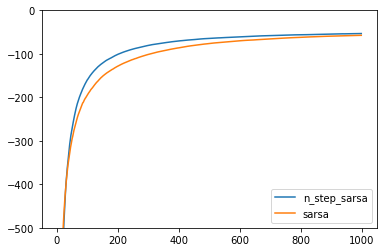

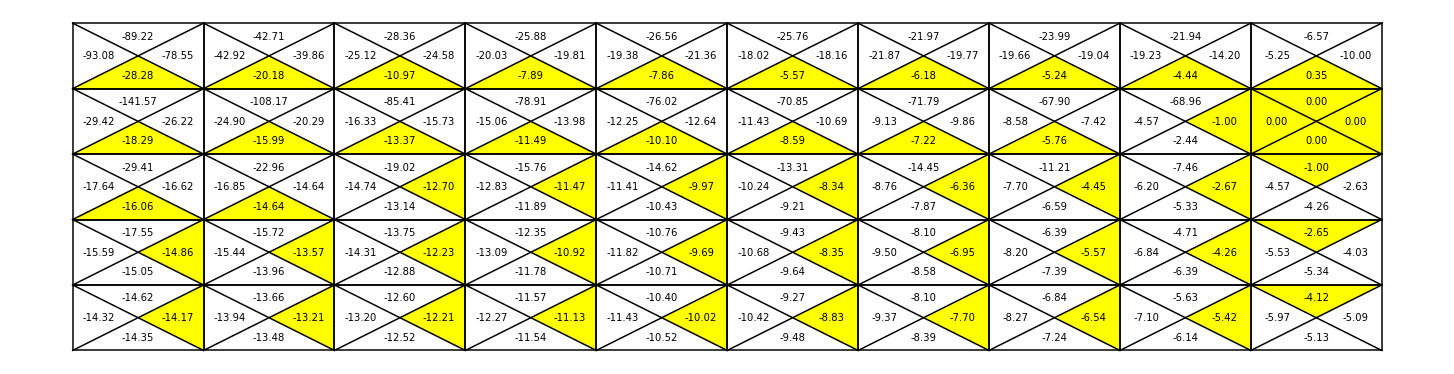

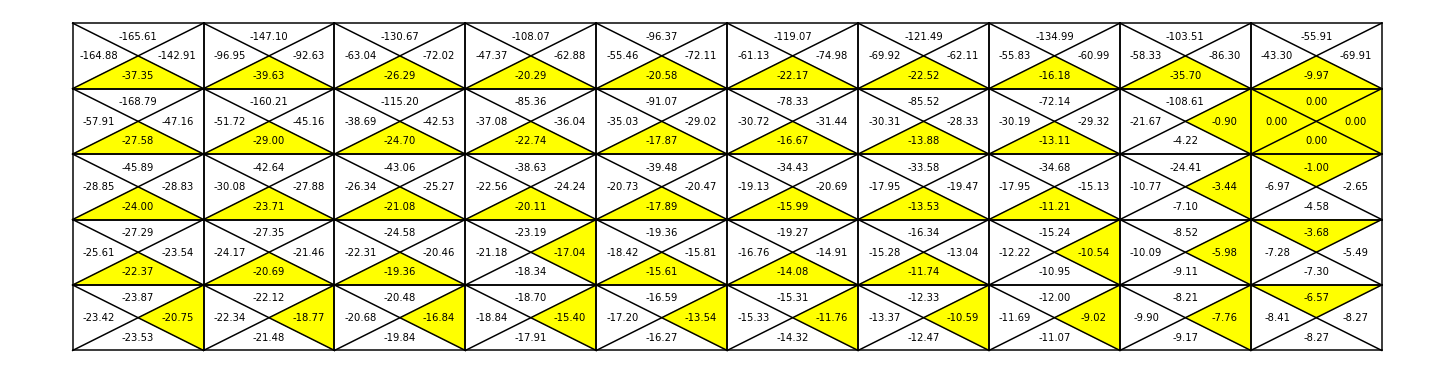

In [163]:
avg_return_sarsa = []
avg_return_n_step_sarsa = []
avg_table_sarsa = []
avg_table_n_step_sarsa = []
for i in range(30):
    return_sarsa, table_sarsa = sarsa()
    return_n_step_sarsa, table_n_step_sarsa = n_step_sarsa()
    avg_return_sarsa.append(averages(return_sarsa))
    avg_table_sarsa.append(table_sarsa)
    avg_return_n_step_sarsa.append(averages(return_n_step_sarsa))
    avg_table_n_step_sarsa.append(table_n_step_sarsa)

plt.plot(np.average(avg_return_n_step_sarsa, axis=0), label='n_step_sarsa')
plt.plot(np.average(avg_return_sarsa, axis=0), label='sarsa')
plt.ylim(-500, 0)
plt.legend()
plt.show()
drawTable(np.average(avg_table_sarsa, axis=0))
drawTable(np.average(avg_table_n_step_sarsa, axis=0))